In [32]:
import pandas as pd
import matplotlib.pyplot as plt

data_groupNorm = pd.read_csv("ResNet50_GroupNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")
data_batchNorm = pd.read_csv("ResNet50_BatchNorm_500_lr_[0.001]_C[0.1]_iid[1]_E[1]_B[10]_sgd_CrossEntropyLoss.csv")

In [33]:
data_groupNorm.head(10)

,Unnamed: 0,train_loss,train_accuracy
0,0,3.540330,0.0954
1,1,2.689827,0.1080
2,2,2.553624,0.1030
3,3,2.478748,0.1650
4,4,2.434896,0.1784
5,5,2.419036,0.1676
6,6,2.307030,0.2158
7,7,2.343163,0.2202
8,8,2.264040,0.2342
9,9,2.230981,0.2324


In [34]:
data_batchNorm.head(10)

,Unnamed: 0,train_loss,train_accuracy
0,0,2.802997,0.1010
1,1,2.690935,0.1004
2,2,2.693004,0.0994
3,3,2.567302,0.1034
4,4,2.523677,0.1180
5,5,2.471527,0.1422
6,6,2.390545,0.1680
7,7,2.439652,0.1750
8,8,2.329075,0.2104
9,9,2.285736,0.2046


In [35]:
train_loss_groupNorm = list(data_groupNorm["train_loss"].values)
train_accuracy_groupNorm = list(data_groupNorm["train_accuracy"].values)
train_loss_batchNorm = list(data_batchNorm["train_loss"].values)
train_accuracy_batchNorm = list(data_batchNorm["train_accuracy"].values)

In [36]:
# parameters
normalization_type = "GroupNorm" #BatchNorm or GroupNorm
iid = 1 # if the data is i.i.d or not
unequal = 0 # in non i.i.d. setting split the data between clients equally or not
num_users = 100 # number of client
frac = 0.1 # fraction of the clients to be used for federated updates
n_epochs = 500
gpu = 0
optimizer = "sgd" #sgd or adam
local_batch_size = 10 # batch size of local updates in each user
lr = 0.001 # learning rate
local_epochs = 1
loss_function = "CrossEntropyLoss"

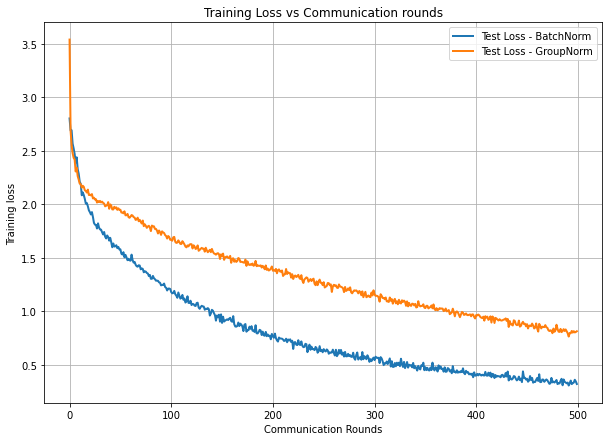

In [37]:
normalization_type = "GroupNorm" #BatchNorm or GroupNorm

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, label="Test Loss - BatchNorm")
ax.plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, label="Test Loss - GroupNorm")

plt.title("Training Loss vs Communication rounds")
plt.ylabel('Training loss')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_acc.png'.format(
    "ResNet50", n_epochs, lr, frac, iid,
    local_epochs, local_batch_size)
plt.savefig(file_name)

plt.show()

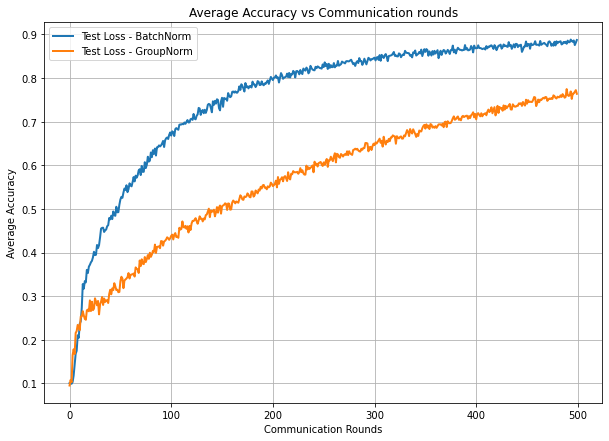

In [38]:
normalization_type = "BatchNorm" #BatchNorm or GroupNorm

# average accuracy vs communication rounds
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_accuracy_batchNorm)), train_accuracy_batchNorm, linewidth=2, label="Test Loss - BatchNorm")
ax.plot(range(len(train_accuracy_groupNorm)), train_accuracy_groupNorm, linewidth=2, label="Test Loss - GroupNorm")


plt.title("Average Accuracy vs Communication rounds")
plt.ylabel('Average Accuracy')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

file_name = '{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}]_loss.png'.format(
    "ResNet50", n_epochs, lr, frac, iid,
    local_epochs, local_batch_size)
plt.savefig(file_name)

plt.show()

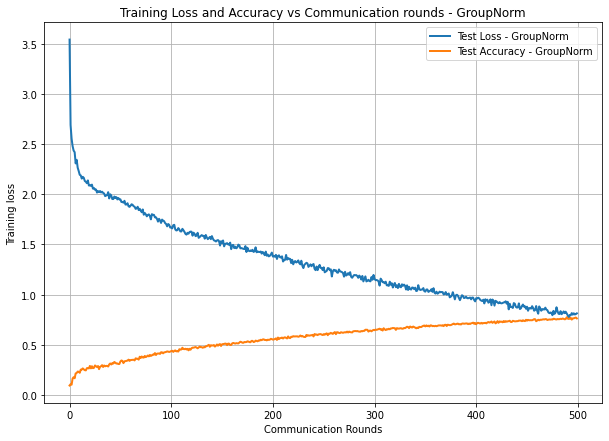

In [39]:
normalization_type = "GroupNorm" #BatchNorm or GroupNorm

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_loss_groupNorm)), train_loss_groupNorm, linewidth=2, label="Test Loss - GroupNorm")
ax.plot(range(len(train_accuracy_groupNorm)), train_accuracy_groupNorm, linewidth=2, label="Test Accuracy - GroupNorm")

plt.title("Training Loss and Accuracy vs Communication rounds - GroupNorm")
plt.ylabel('Training loss')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

file_name = '{}_{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}].png'.format(
    "ResNet50", normalization_type, n_epochs, lr, frac, iid,
    local_epochs, local_batch_size)
plt.savefig(file_name)

plt.show()

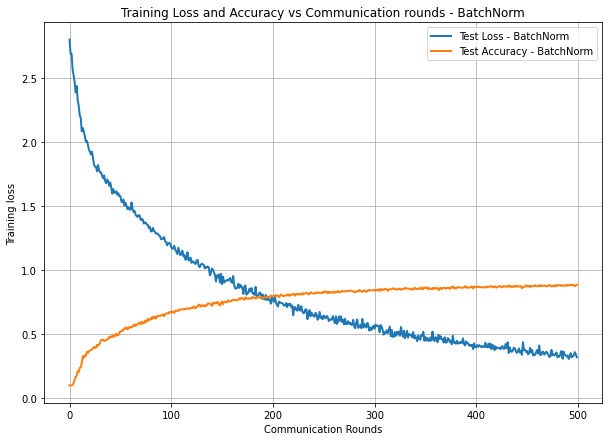

In [40]:
normalization_type = "BatchNorm" #BatchNorm or GroupNorm

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(range(len(train_loss_batchNorm)), train_loss_batchNorm, linewidth=2, label="Test Loss - BatchNorm")
ax.plot(range(len(train_accuracy_batchNorm)), train_accuracy_batchNorm, linewidth=2, label="Test Accuracy - BatchNorm")

plt.title("Training Loss and Accuracy vs Communication rounds - BatchNorm")
plt.ylabel('Training loss')
plt.xlabel('Communication Rounds')

ax.legend()
ax.grid()

file_name = '{}_{}_{}_lr_[{}]_C[{}]_iid[{}]_E[{}]_B[{}].png'.format(
    "ResNet50", normalization_type, n_epochs, lr, frac, iid,
    local_epochs, local_batch_size)
plt.savefig(file_name)

plt.show()